In [1]:
from f3dasm.optimization.run_optimization import run_multiple_realizations
from f3dasm.base.designofexperiments import make_nd_continuous_design

from f3dasm.base.data import Data

from f3dasm.simulation.benchmark_functions import Levy, Ackley
from f3dasm.optimization.pygmo_implementations import CMAES
from f3dasm.optimization.gradient_based_algorithms import Adam, Momentum
from f3dasm.sampling.samplers import LatinHypercubeSampling


In [2]:
dim = 20
i = 30
r = 20
hyperparameters = {'step_size': 1e-2}
design = make_nd_continuous_design(bounds=[0., 1.], dimensions=dim)

func = Ackley(noise=False, scale_bounds=[-32.768, 32.768])
data = Data(designspace=design)
optimizer = Adam(data=data, hyperparameters=hyperparameters)
sampler = LatinHypercubeSampling(doe=design)


all_data = run_multiple_realizations(optimizer=optimizer, 
function=func,
sampler=sampler,
iterations=i,
realizations=r
)


In [3]:
import pandas as pd
mean_y = pd.concat([d.get_output_data() for d in all_data], axis=1).mean(axis=1)

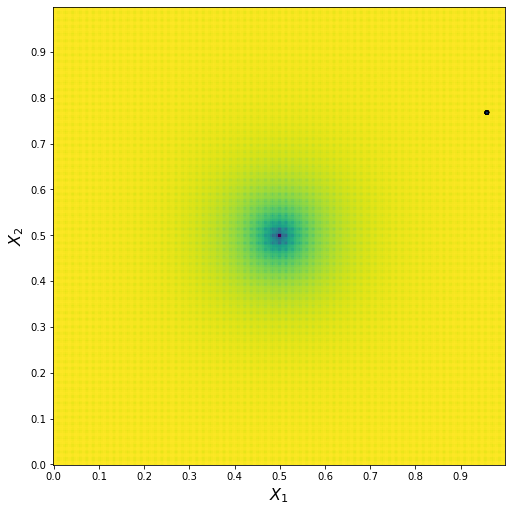

In [7]:
func.plot_data(data=all_data[1])

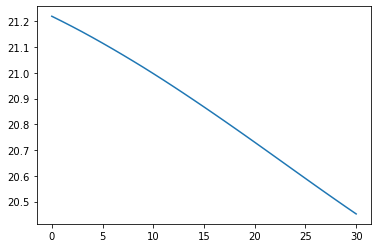

In [5]:
import matplotlib.pyplot as plt
plt.plot(mean_y)

In [6]:
t = None
t.keys()

AttributeError: 'NoneType' object has no attribute 'keys'